In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [5]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
df['target']=iris.target

In [8]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<Axes: ylabel='target'>

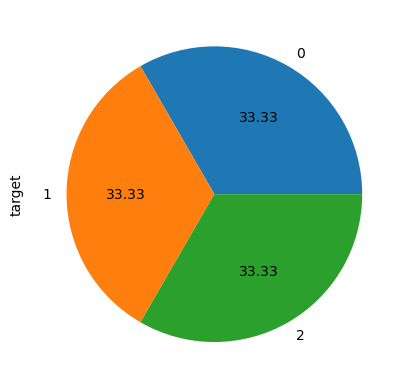

In [13]:
df['target'].value_counts().plot(kind='pie',autopct='%0.2f')

In [14]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [15]:
df=df.drop(columns=['sepal length (cm)','petal width (cm)'])

In [16]:
df.head()

,sepal width (cm),petal length (cm),target
0,3.5,1.4,0
1,3.0,1.4,0
2,3.2,1.3,0
3,3.1,1.5,0
4,3.6,1.4,0


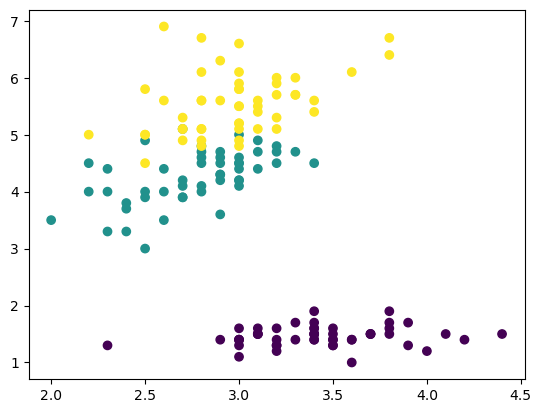

In [21]:
plt.scatter(df['sepal width (cm)'],df['petal length (cm)'],c=df['target'])

In [23]:
df.describe()

,sepal width (cm),petal length (cm),target
count,150.000000,150.000000,150.000000
mean,3.057333,3.758000,1.000000
std,0.435866,1.765298,0.819232
min,2.000000,1.000000,0.000000
25%,2.800000,1.600000,0.000000
50%,3.000000,4.350000,1.000000
75%,3.300000,5.100000,2.000000
max,4.400000,6.900000,2.000000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_25064\107776459.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


<Axes: ylabel='Density'>

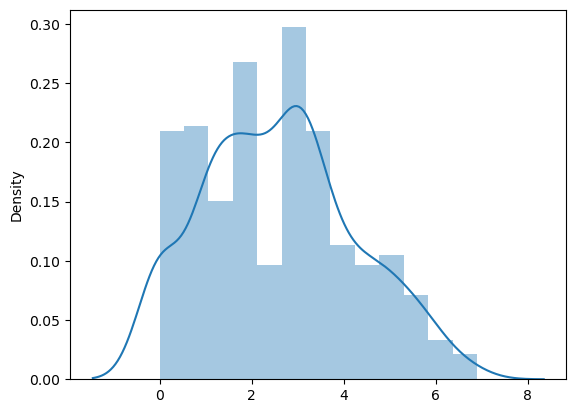

In [24]:
sns.distplot(df)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions

In [27]:
df_train=df.iloc[:60,:]
df_val=df.iloc[60:80,:]
df_test=df.iloc[80:,:]

In [44]:
def pred(model,X,y):
    model.fit(X,y)
    plot_decision_regions(X.values,y.values,clf=model)
    plt.show()
    y_pred=model.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [45]:
X_test=df_test.iloc[:,0:2]
y_test=df_test.iloc[:,-1]

G:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


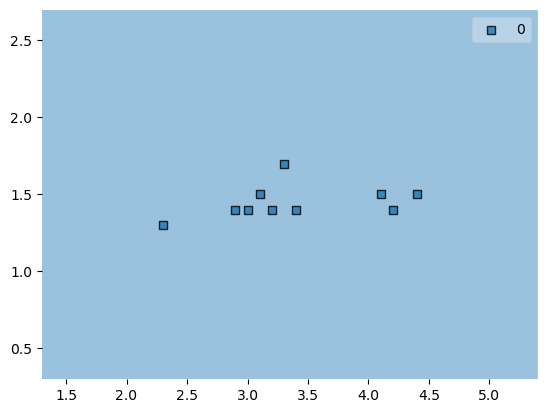

G:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.0


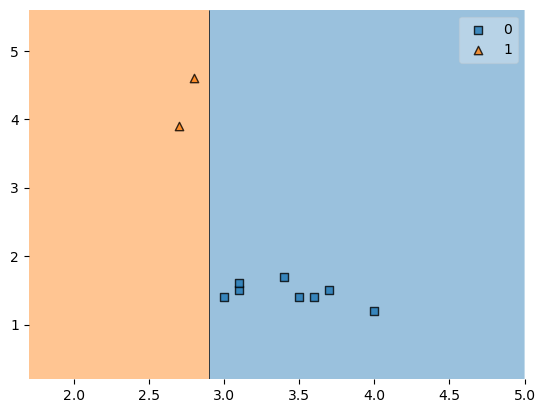

0.17142857142857143


G:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


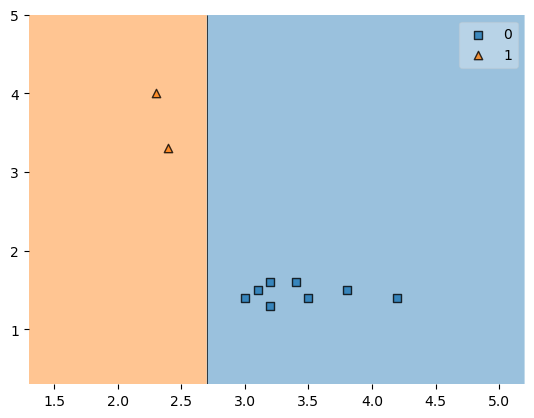

0.15714285714285714


G:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


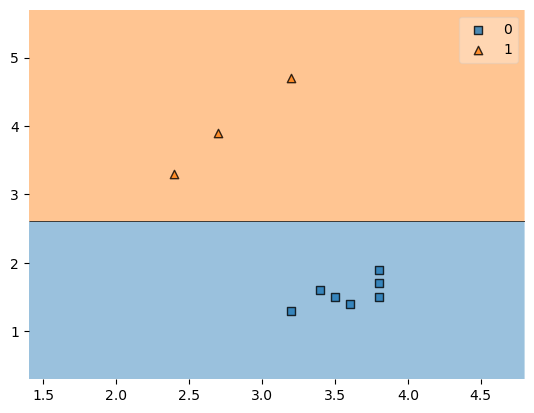

0.2857142857142857


G:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


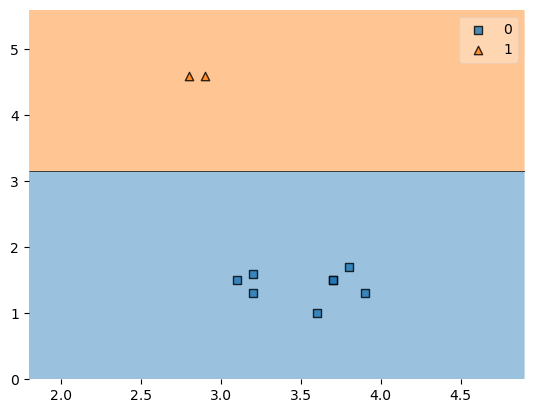

0.2714285714285714


In [46]:
for i in range(1,6):
    model=DecisionTreeClassifier()
    train=df_train.sample(10)
    X_train=train.iloc[:,0:2]
    y_train=train.iloc[:,-1]
    pred(model,X_train,y_train)

In [48]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(base_estimator=DecisionTreeClassifier(),max_samples=0.5,n_estimators=500,verbose=1,n_jobs=-1)

In [49]:
bc.fit(df_train.iloc[:,0:2],df_train.iloc[:,-1])

G:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    8.6s remaining:  1.0min
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    8.7s finished


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=500, n_jobs=-1, verbose=1)

In [50]:
y_pred=bc.predict(X_test)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.5s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished


In [51]:
accuracy_score(y_test,y_pred)

0.2857142857142857

In [52]:
#pasting

In [54]:
bc_pasting=BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=4),n_estimators=7,n_jobs=-1,max_samples=0.5,bootstrap=False)

G:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


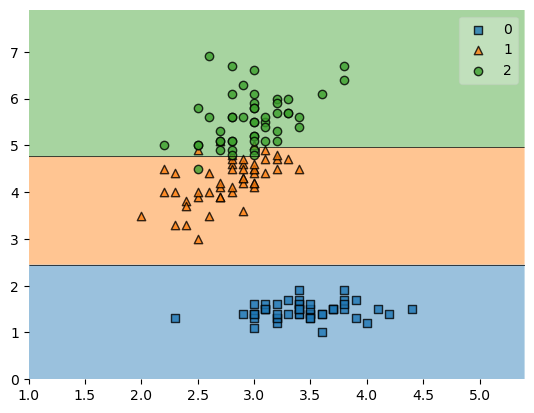

0.9714285714285714


In [55]:
pred(bc_pasting,df.iloc[:,0:2],df.iloc[:,-1])

In [56]:
#Random Subspaces

In [57]:
bc3=BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=10,n_jobs=-1,bootstrap=False,max_samples=1,max_features=0.7,bootstrap_features=True)

In [61]:
#Random Patches

In [62]:
bc4=BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=500,max_samples=0.25,bootstrap=True,max_features=0.5,bootstrap_features=True)

G:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
G:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


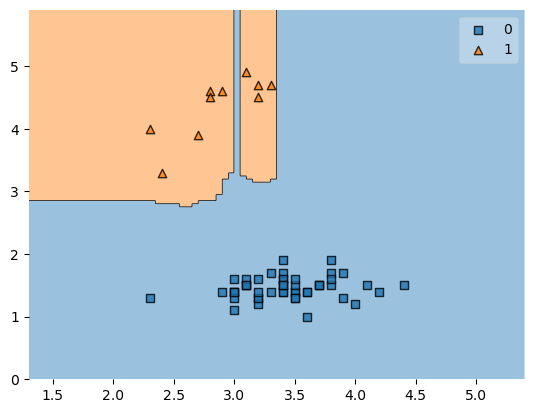

0.2714285714285714


In [63]:
pred(bc4,df_train.iloc[:,0:2],df_train.iloc[:,-1])

In [64]:
parameters = {
    'n_estimators': [50,100,500], 
    'max_samples': [0.1,0.4,0.7,1.0],
    'bootstrap' : [True,False],
    'max_features' : [0.1,0.4,0.7,1.0]
    }

In [65]:
from sklearn.model_selection import GridSearchCV

In [68]:
gc=GridSearchCV(estimator=bc4,param_grid=parameters,cv=10)

In [69]:
gc.fit(df_train.iloc[:,0:2],df_train.iloc[:,-1])

G:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
G:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
G:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
G:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
G:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
G:\anaconda\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was ren

GridSearchCV(cv=10,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         bootstrap_features=True,
                                         max_features=0.5, max_samples=0.25,
                                         n_estimators=500),
             param_grid={'bootstrap': [True, False],
                         'max_features': [0.1, 0.4, 0.7, 1.0],
                         'max_samples': [0.1, 0.4, 0.7, 1.0],
                         'n_estimators': [50, 100, 500]})

In [71]:
print(gc.best_params_)
print(gc.best_score_)

{'bootstrap': True, 'max_features': 0.1, 'max_samples': 0.4, 'n_estimators': 50}
1.0


In [97]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [74]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\cars.csv")

In [75]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [78]:
df.isnull().sum()

brand            0
km_driven        0
fuel             0
owner            0
selling_price    0
dtype: int64

In [79]:
df.duplicated().any()

True

In [80]:
df.drop_duplicates(inplace=True)

In [81]:
df.shape

(6450, 5)

In [82]:
df.head(2)

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000


In [131]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

In [125]:
steps=ColumnTransformer(transformers=[('oh',OneHotEncoder(),[0]),('ohe',OneHotEncoder(),[2]),('ohh',OneHotEncoder(),[3])])

In [137]:
pipeline=Pipeline([('ct',steps),('mms',MaxAbsScaler()),('ridge',Ridge())])

In [138]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:4],df.iloc[:,-1],test_size=0.2,random_state=21)

In [139]:
X_train.sample(1)

,brand,km_driven,fuel,owner
40,Maruti,76000,Petrol,First Owner


In [140]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5160, 4)
(1290, 4)
(5160,)
(1290,)


In [141]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('oh', OneHotEncoder(), [0]),
                                                 ('ohe', OneHotEncoder(), [2]),
                                                 ('ohh', OneHotEncoder(),
                                                  [3])])),
                ('mms', MaxAbsScaler()), ('ridge', Ridge())])

In [142]:
y_pred=pipeline.predict(X_test)

In [143]:
r2_score(y_test,y_pred)

0.45314689870628855

In [144]:
l=[Ridge(),Lasso(),DecisionTreeRegressor(),KNeighborsRegressor()]

In [147]:
for i in l:
    pipeline=Pipeline([('ct',steps),('mms',MaxAbsScaler()),('ridge',i)])
    pipeline.fit(X_train,y_train)
    y_pred=pipeline.predict(X_test)
    print(r2_score(y_test,y_pred))
    

0.45314689870628855
0.45312381835783966
0.47916975695197084
0.4261863164059939


G:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42127344843650.75, tolerance: 157501867317.37112
  model = cd_fast.sparse_enet_coordinate_descent(


In [148]:
from sklearn.ensemble import BaggingRegressor

In [149]:
params = {'base_estimator': [None, LinearRegression(), KNeighborsRegressor(), Ridge(), Lasso()],
          'n_estimators': [20,50,100],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

In [150]:
from sklearn.model_selection import GridSearchCV

In [153]:
br=BaggingRegressor()

In [154]:
bruh=GridSearchCV(br,param_grid=params,n_jobs=-1,cv=10)

In [160]:
bruh.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(), n_jobs=-1,
             param_grid={'base_estimator': [None, LinearRegression(),
                                            KNeighborsRegressor(), Ridge(),
                                            Lasso()],
                         'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.5, 1.0], 'max_samples': [0.5, 1.0],
                         'n_estimators': [20, 50, 100]})

In [161]:
bruh.best_params_
bruh.best_score_

0.5601405198838926

In [156]:
X_train=steps.fit_transform(X_train)

In [157]:
X_test=steps.transform(X_test)

In [159]:
X_train

(5160, 41)